<mark> Tools importation </mark>

In [1]:
#basics tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#image processing tools
import cv2 as cv
import PIL
#sklearn functionnality
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
#tensorflow features
import tensorflow as tf
from tensorflow import keras
#other tools
import pathlib

<mark> Download and load datasets </mark>

In [2]:
data_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
datasets_dir=tf.keras.utils.get_file('flower_photos',origin=data_url,cache_dir='/content/drive/MyDrive/googleColabStuff/ColabStuff/data',untar=True)

In [3]:
datasets_dir

'/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/flower_photos'

In [4]:
data_dir=pathlib.Path(datasets_dir)
data_dir

PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
total_img=len(list(data_dir.glob('*/*.jpg')))
total_img

3670

In [7]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/googleColabStuff/ColabStuff/data/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg')]

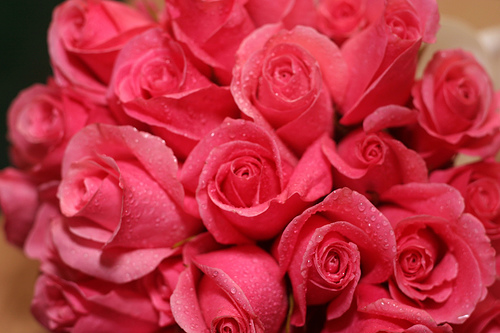

In [8]:
PIL.Image.open(str(roses[1]))

In [9]:
tulips=list(data_dir.glob('tulips/*'))

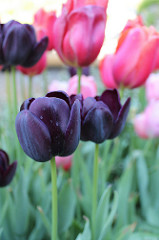

In [10]:
PIL.Image.open(str(tulips[1]))

In [11]:
flowers_images_dict={
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

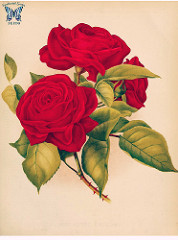

In [12]:
PIL.Image.open(flowers_images_dict['roses'][0])

In [13]:
flowers_images_labels_dict={
    'daisy':1,
    'dandelion':2,
    'roses':0,
    'sunflowers':3,
    'tulips':4
}

<mark> Using opencv to <strong> read </strong>and <strong> resize </strong>images </mark>

In [14]:
img=cv.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 178, 3)

In [15]:
cv.resize(img,(256,256)).shape

(256, 256, 3)

In [16]:
 X,y=[],[]
 for image_name,images in flowers_images_dict.items():
    for image in images:
      img=cv.imread(str(image))
      resized_img=cv.resize(img,(256,256))
      X.append(resized_img)
      y.append(flowers_images_labels_dict[image_name])  

KeyboardInterrupt: ignored

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=111,stratify=y)

Scaling our values

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

<mark> Build the neurone </mark>

In [ ]:
data_augmentation=keras.Sequential([
  keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(256,256,3)),
  keras.layers.experimental.preprocessing.RandomRotation(0.1),
  keras.layers.experimental.preprocessing.RandomZoom(0.1)                             
])

In [ ]:
model=keras.Sequential([
    # CNN parts:for extract feature in each image
    data_augmentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    #classification parts
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5)
])
tb_call_back=tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/googleColabStuff/ColabStuff/data/call-back-storage/',histogram_freq=1)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()

In [ ]:
model.fit(X_train_scaled,y_train,epochs=10,callbacks=[tb_call_back])

In [ ]:
model.evaluate(X_test,y_test)